<a href="https://colab.research.google.com/github/Prachii26/DeepLearningCMPE258/blob/main/Neural%20Network%20using%20numpy%2C%20keras%20and%20pytorch/Colabs/Colab_(E)_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import all necessary libraries and check versions

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print("\nAll libraries imported successfully!")

NumPy version: 2.0.2
TensorFlow version: 2.19.0
Keras version: 3.10.0

All libraries imported successfully!


In [ ]:
# Cell 2: Define helper function to generate synthetic dataset

# Cell 2: Define helper function to generate synthetic dataset

def make_dataset(n_samples=1000, noise_level=0.1):
    """
    Generate synthetic 3-variable non-linear regression dataset.
    Equation: y = sin(x1) * x2^2 + cos(x2) * x1 + 0.5 * x3 + noise
    """
    x1 = np.random.uniform(-2, 2, n_samples)
    x2 = np.random.uniform(-2, 2, n_samples)
    x3 = np.random.uniform(-2, 2, n_samples)

    # Stack into feature matrix
    X = np.column_stack([x1, x2, x3]).astype(np.float32)

    # Non-linear target with small noise
    y = (np.sin(x1) * x2**2 +
         np.cos(x2) * x1 +
         0.5 * x3 +
         np.random.normal(0, noise_level, n_samples))
    y = y.reshape(-1, 1).astype(np.float32)

    return X, y

# Generate dataset
X, y = make_dataset(n_samples=1000, noise_level=0.1)

print(f"Dataset generated: X shape = {X.shape}, y shape = {y.shape}")
print(f"X sample:\n{X[:3]}")
print(f"y sample:\n{y[:3]}")

Dataset generated: X shape = (1000, 3), y shape = (1000, 1)
X sample:
[[-0.5018395  -1.2594683  -0.9531773 ]
 [ 1.8028573   0.16760379 -1.0120848 ]
 [ 0.9279758   1.4917834   1.6250184 ]]
y sample:
[[-1.2873732]
 [ 1.3605906]
 [ 2.7353542]]


In [ ]:
# Cell 3: Define train/test split helper function

def train_test_split(X, y, test_size=0.2):
    """
    Split dataset into train and test sets.
    """
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    n_train = n_samples - n_test

    # Split
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]

    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (800, 3), y_train = (800, 1)
Test set: X_test = (200, 3), y_test = (200, 1)


In [ ]:
# Cell 4: Define MSE loss function

def mse(y_true, y_pred):
    """
    Calculate Mean Squared Error loss.
    Works with both NumPy arrays and TensorFlow tensors.
    """
    return np.mean((y_true - y_pred) ** 2)

# Test the MSE function
dummy_true = np.array([[1.0], [2.0], [3.0]])
dummy_pred = np.array([[1.1], [2.1], [2.9]])
test_mse = mse(dummy_true, dummy_pred)

print(f"MSE function defined successfully!")
print(f"Test MSE: {test_mse:.6f}")


MSE function defined successfully!
Test MSE: 0.010000


In [ ]:
# Cell 5: NumPy reference - forward pass equations only

def forward_numpy_reference(X, W1, b1, W2, b2, W3, b3):
    """
    Reference NumPy forward pass for video walkthrough.
    Architecture: 3 -> 10 -> 8 -> 1
    Activations: ReLU -> Tanh -> Linear
    """
    # Layer 1: Input -> Hidden1 (ReLU)
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)  # ReLU

    # Layer 2: Hidden1 -> Hidden2 (Tanh)
    Z2 = np.dot(A1, W2) + b2
    A2 = np.tanh(Z2)  # Tanh

    # Layer 3: Hidden2 -> Output (Linear)
    Z3 = np.dot(A2, W3) + b3
    output = Z3  # Linear (no activation)

    return output

print("NumPy reference forward pass defined!")
print("Architecture: 3 -> 10 -> 8 -> 1")
print("Activations: ReLU -> Tanh -> Linear")

NumPy reference forward pass defined!
Architecture: 3 -> 10 -> 8 -> 1
Activations: ReLU -> Tanh -> Linear


In [ ]:
# Cell 6: Variant (i) - TensorFlow from scratch - Initialize parameters

def init_params_tf_scratch():
    """
    Initialize weights and biases as TensorFlow Variables.
    Architecture: 3 -> 10 -> 8 -> 1
    """
    # Layer 1: 3 -> 10
    W1 = tf.Variable(tf.random.normal([3, 10], stddev=0.1), name='W1')
    b1 = tf.Variable(tf.zeros([1, 10]), name='b1')

    # Layer 2: 10 -> 8
    W2 = tf.Variable(tf.random.normal([10, 8], stddev=0.1), name='W2')
    b2 = tf.Variable(tf.zeros([1, 8]), name='b2')

    # Layer 3: 8 -> 1
    W3 = tf.Variable(tf.random.normal([8, 1], stddev=0.1), name='W3')
    b3 = tf.Variable(tf.zeros([1, 1]), name='b3')

    return W1, b1, W2, b2, W3, b3

# Initialize parameters
W1, b1, W2, b2, W3, b3 = init_params_tf_scratch()

print("TensorFlow Variables initialized:")
print(f"W1: {W1.shape}, b1: {b1.shape}")
print(f"W2: {W2.shape}, b2: {b2.shape}")
print(f"W3: {W3.shape}, b3: {b3.shape}")

TensorFlow Variables initialized:
W1: (3, 10), b1: (1, 10)
W2: (10, 8), b2: (1, 8)
W3: (8, 1), b3: (1, 1)


In [ ]:
# Cell 7: Variant (i) - TensorFlow from scratch - Forward pass function

def forward_tf_scratch(X, W1, b1, W2, b2, W3, b3):
    """
    Forward pass using TensorFlow ops only (no Keras layers).
    """
    # Layer 1: Input -> Hidden1 (ReLU)
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)

    # Layer 2: Hidden1 -> Hidden2 (Tanh)
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.tanh(Z2)

    # Layer 3: Hidden2 -> Output (Linear)
    Z3 = tf.matmul(A2, W3) + b3
    output = Z3

    return output

# Test forward pass
test_output = forward_tf_scratch(tf.constant(X_train[:5]), W1, b1, W2, b2, W3, b3)
print(f"Forward pass test output shape: {test_output.shape}")
print(f"Sample predictions:\n{test_output.numpy()[:3]}")

Forward pass test output shape: (5, 1)
Sample predictions:
[[-0.07119388]
 [ 0.00702161]
 [ 0.00976399]]


In [ ]:
# Cell 8: Variant (i) - TensorFlow from scratch - Training loop

def train_tf_scratch(X_train, y_train, X_test, y_test, W1, b1, W2, b2, W3, b3,
                     epochs=100, lr=0.01, print_every=20):
    """
    Train using TensorFlow GradientTape and manual gradient descent.
    """
    params = [W1, b1, W2, b2, W3, b3]

    X_train_tf = tf.constant(X_train)
    y_train_tf = tf.constant(y_train)

    print("Training Variant (i): TensorFlow from scratch")
    print("-" * 50)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            # Forward pass
            predictions = forward_tf_scratch(X_train_tf, W1, b1, W2, b2, W3, b3)
            # Compute MSE loss
            loss = tf.reduce_mean(tf.square(predictions - y_train_tf))

        # Compute gradients
        gradients = tape.gradient(loss, params)

        # Manual gradient descent update
        for param, grad in zip(params, gradients):
            param.assign_sub(lr * grad)

        # Print progress
        if (epoch + 1) % print_every == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.numpy():.6f}")

    # Test evaluation
    test_predictions = forward_tf_scratch(tf.constant(X_test), W1, b1, W2, b2, W3, b3)
    test_loss = tf.reduce_mean(tf.square(test_predictions - tf.constant(y_test))).numpy()

    print("-" * 50)
    print(f"Final Test Loss: {test_loss:.6f}\n")

    return test_loss

# Train the model
test_loss_i = train_tf_scratch(X_train, y_train, X_test, y_test,
                                W1, b1, W2, b2, W3, b3, epochs=100, lr=0.01)

Training Variant (i): TensorFlow from scratch
--------------------------------------------------
Epoch 20/100 - Loss: 2.971760
Epoch 40/100 - Loss: 2.884778
Epoch 60/100 - Loss: 2.716147
Epoch 80/100 - Loss: 2.365212
Epoch 100/100 - Loss: 1.714377
--------------------------------------------------
Final Test Loss: 1.508843



In [ ]:
# Cell 9: Variant (ii) - TensorFlow with builtin layers (subclassing) - Build model

class ThreeLayerModel(tf.keras.Model):
    """
    Custom model using tf.keras.Model subclassing.
    Architecture: 3 -> 10 -> 8 -> 1
    """
    def __init__(self):
        super(ThreeLayerModel, self).__init__()
        self.dense1 = layers.Dense(10, activation='relu', name='hidden1')
        self.dense2 = layers.Dense(8, activation='tanh', name='hidden2')
        self.dense3 = layers.Dense(1, activation='linear', name='output')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

def build_model_subclass():
    """Build and return the subclassed model."""
    model = ThreeLayerModel()
    # Build the model by calling it once
    model(tf.constant(X_train[:1]))
    return model

# Build model
model_ii = build_model_subclass()

print("Variant (ii): Model Subclassing")
print(model_ii.summary())

Variant (ii): Model Subclassing


Model: "three_layer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (1, 10)                │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (1, 8)                 │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (1, 1)                 │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Cell 10: Variant (ii) - TensorFlow with builtin layers (subclassing) - Train model

def train_subclass(model, X_train, y_train, X_test, y_test, epochs=100, lr=0.01, print_every=20):
    """
    Train subclassed model using GradientTape.
    """
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    X_train_tf = tf.constant(X_train)
    y_train_tf = tf.constant(y_train)

    print("Training Variant (ii): Model Subclassing with GradientTape")
    print("-" * 50)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = model(X_train_tf, training=True)
            loss = tf.reduce_mean(tf.square(predictions - y_train_tf))

        # Compute and apply gradients
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if (epoch + 1) % print_every == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.numpy():.6f}")

    # Test evaluation
    test_predictions = model(tf.constant(X_test), training=False)
    test_loss = tf.reduce_mean(tf.square(test_predictions - tf.constant(y_test))).numpy()

    print("-" * 50)
    print(f"Final Test Loss: {test_loss:.6f}\n")

    return test_loss

# Train the model
test_loss_ii = train_subclass(model_ii, X_train, y_train, X_test, y_test, epochs=100, lr=0.01)

Training Variant (ii): Model Subclassing with GradientTape
--------------------------------------------------
Epoch 20/100 - Loss: 0.694153
Epoch 40/100 - Loss: 0.326103
Epoch 60/100 - Loss: 0.247631
Epoch 80/100 - Loss: 0.218052
Epoch 100/100 - Loss: 0.196682
--------------------------------------------------
Final Test Loss: 0.167848



In [ ]:
# Cell 11: Variant (iii) - TensorFlow Functional API - Build model

def build_model_functional():
    """
    Build model using Functional API.
    Architecture: 3 -> 10 -> 8 -> 1
    """
    inputs = keras.Input(shape=(3,), name='input')

    # Hidden layer 1: ReLU
    x = layers.Dense(10, activation='relu', name='hidden1')(inputs)

    # Hidden layer 2: Tanh
    x = layers.Dense(8, activation='tanh', name='hidden2')(x)

    # Output layer: Linear
    outputs = layers.Dense(1, activation='linear', name='output')(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

    return model

# Build model
model_iii = build_model_functional()

print("Variant (iii): Functional API")
print(model_iii.summary())

Variant (iii): Functional API


Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Cell 12: Variant (iii) - TensorFlow Functional API - Train model

def train_functional(model, X_train, y_train, X_test, y_test, epochs=100, lr=0.01):
    """
    Train functional API model using compile + fit.
    """
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='mse'
    )

    print("Training Variant (iii): Functional API with compile/fit")
    print("-" * 50)

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        verbose=0,
        validation_data=(X_test, y_test)
    )

    # Print some epochs
    for i in [19, 39, 59, 79, 99]:
        if i < len(history.history['loss']):
            print(f"Epoch {i + 1}/{epochs} - Loss: {history.history['loss'][i]:.6f}")

    # Test evaluation
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    # Handle if test_loss is a list or array
    if isinstance(test_loss, (list, tuple)):
        test_loss = test_loss[0]

    print("-" * 50)
    print(f"Final Test Loss: {test_loss:.6f}\n")

    return test_loss

# Train the model
test_loss_iii = train_functional(model_iii, X_train, y_train, X_test, y_test, epochs=100, lr=0.01)

Training Variant (iii): Functional API with compile/fit
--------------------------------------------------
Epoch 20/100 - Loss: 0.017573
Epoch 40/100 - Loss: 0.017270
Epoch 60/100 - Loss: 0.016985
Epoch 80/100 - Loss: 0.016698
Epoch 100/100 - Loss: 0.016680
--------------------------------------------------
Final Test Loss: 0.022685



In [ ]:
# Cell 13: Variant (iv) - TensorFlow Sequential API - Build and train model

def build_model_sequential():
    """
    Build model using Sequential API.
    Architecture: 3 -> 10 -> 8 -> 1
    """
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=(3,), name='hidden1'),
        layers.Dense(8, activation='tanh', name='hidden2'),
        layers.Dense(1, activation='linear', name='output')
    ], name='sequential_model')

    return model

def train_sequential(model, X_train, y_train, X_test, y_test, epochs=100, lr=0.01):
    """
    Train Sequential model using compile + fit.
    """
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='mse'
    )

    print("Training Variant (iv): Sequential API with compile/fit")
    print("-" * 50)

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        verbose=0,
        validation_data=(X_test, y_test)
    )

    # Print some epochs
    for i in [19, 39, 59, 79, 99]:
        if i < len(history.history['loss']):
            print(f"Epoch {i + 1}/{epochs} - Loss: {history.history['loss'][i]:.6f}")

    # Test evaluation
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    # Handle if test_loss is a list or array
    if isinstance(test_loss, (list, tuple)):
        test_loss = test_loss[0]

    print("-" * 50)
    print(f"Final Test Loss: {test_loss:.6f}\n")

    return test_loss

# Build and train model
model_iv = build_model_sequential()
print("Variant (iv): Sequential API")
print(model_iv.summary())
print()
test_loss_iv = train_sequential(model_iv, X_train, y_train, X_test, y_test, epochs=100, lr=0.01)

Variant (iv): Sequential API


Model: "sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None

Training Variant (iv): Sequential API with compile/fit
--------------------------------------------------
Epoch 20/100 - Loss: 0.042239
Epoch 40/100 - Loss: 0.033616
Epoch 60/100 - Loss: 0.030237
Epoch 80/100 - Loss: 0.026407
Epoch 100/100 - Loss: 0.022172
--------------------------------------------------
Final Test Loss: 0.023648



In [ ]:
# Cell 14: Summary comparison table of all variants

print("=" * 70)
print(" " * 15 + "FINAL COMPARISON - ALL VARIANTS")
print("=" * 70)
print()
print(f"{'Variant':<40} {'Test Loss (MSE)':<20}")
print("-" * 70)
print(f"{'(i) TensorFlow from scratch':<40} {test_loss_i:<20.6f}")
print(f"{'(ii) Model Subclassing + GradientTape':<40} {test_loss_ii:<20.6f}")
print(f"{'(iii) Functional API + compile/fit':<40} {test_loss_iii:<20.6f}")
print(f"{'(iv) Sequential API + compile/fit':<40} {test_loss_iv:<20.6f}")
print("-" * 70)
print()

# Find best variant
variants = [
    ("(i) TensorFlow from scratch", test_loss_i),
    ("(ii) Model Subclassing", test_loss_ii),
    ("(iii) Functional API", test_loss_iii),
    ("(iv) Sequential API", test_loss_iv)
]
best_variant = min(variants, key=lambda x: x[1])

print(f"Best performing variant: {best_variant[0]} with test loss {best_variant[1]:.6f}")
print()
print("All variants use the same:")
print("  • Architecture: 3 -> 10 -> 8 -> 1")
print("  • Activations: ReLU -> Tanh -> Linear")
print("  • Loss: Mean Squared Error (MSE)")
print("  • Dataset: Same train/test split")
print("=" * 70)

               FINAL COMPARISON - ALL VARIANTS

Variant                                  Test Loss (MSE)     
----------------------------------------------------------------------
(i) TensorFlow from scratch              1.508843            
(ii) Model Subclassing + GradientTape    0.167848            
(iii) Functional API + compile/fit       0.022685            
(iv) Sequential API + compile/fit        0.023648            
----------------------------------------------------------------------

Best performing variant: (iii) Functional API with test loss 0.022685

All variants use the same:
  • Architecture: 3 -> 10 -> 8 -> 1
  • Activations: ReLU -> Tanh -> Linear
  • Loss: Mean Squared Error (MSE)
  • Dataset: Same train/test split


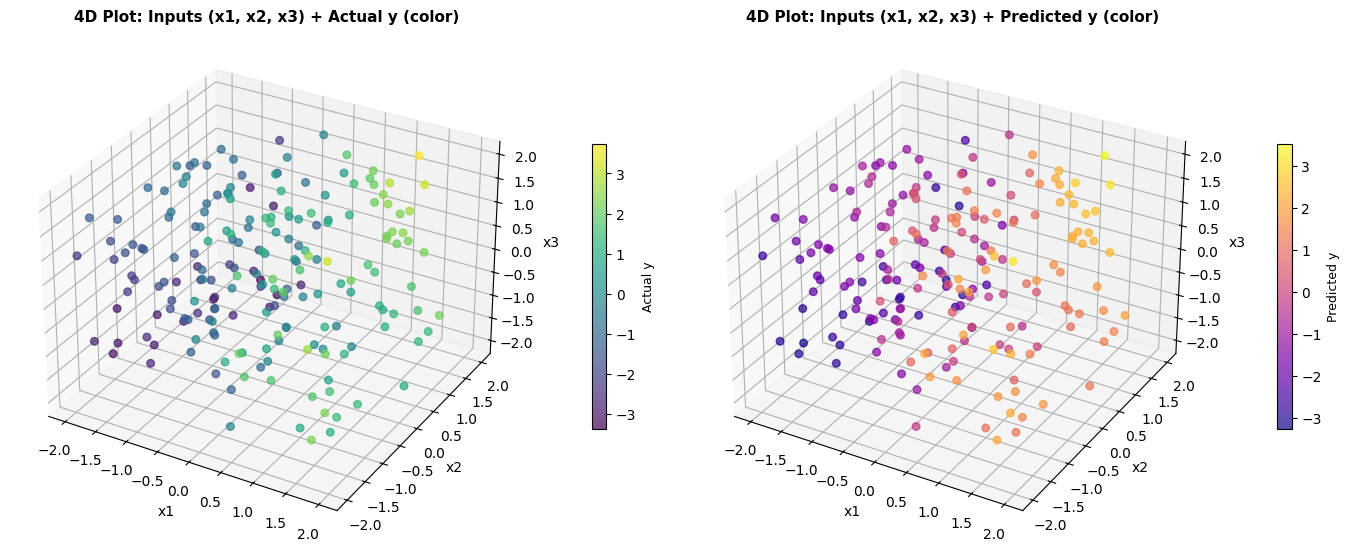

4D visualization complete!
Left: Actual target values shown as color
Right: Model predictions shown as color


In [ ]:
# Cell 15: Create 4D visualization using 3D scatter plot with color

# Use test set for visualization
fig = plt.figure(figsize=(14, 6))

# Get predictions from one of the models (using Sequential model)
predictions = model_iv.predict(X_test, verbose=0).flatten()

# Plot 1: 3D scatter with actual values as color
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2],
                       c=y_test.flatten(), cmap='viridis', s=30, alpha=0.7)
ax1.set_xlabel('x1', fontsize=10)
ax1.set_ylabel('x2', fontsize=10)
ax1.set_zlabel('x3', fontsize=10)
ax1.set_title('4D Plot: Inputs (x1, x2, x3) + Actual y (color)', fontsize=11, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.5, pad=0.1)
cbar1.set_label('Actual y', fontsize=9)

# Plot 2: 3D scatter with predicted values as color
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2],
                       c=predictions, cmap='plasma', s=30, alpha=0.7)
ax2.set_xlabel('x1', fontsize=10)
ax2.set_ylabel('x2', fontsize=10)
ax2.set_zlabel('x3', fontsize=10)
ax2.set_title('4D Plot: Inputs (x1, x2, x3) + Predicted y (color)', fontsize=11, fontweight='bold')
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.5, pad=0.1)
cbar2.set_label('Predicted y', fontsize=9)

plt.tight_layout()
plt.show()

print("4D visualization complete!")
print("Left: Actual target values shown as color")
print("Right: Model predictions shown as color")

In [ ]:
# Cell 16: Final completion summary

print("=" * 70)
print(" " * 20 + "NOTEBOOK COMPLETE!")
print("=" * 70)
print()
print("✅ ALL VARIANTS IMPLEMENTED SUCCESSFULLY:")
print("-" * 70)
print()
print("📌 Variant (i): TensorFlow from scratch")
print("   • tf.Variable for weights/biases")
print("   • tf.matmul for forward pass")
print("   • tf.GradientTape for gradients")
print("   • Manual gradient descent updates")
print()
print("📌 Variant (ii): Model Subclassing")
print("   • Subclass tf.keras.Model")
print("   • Use tf.keras.layers.Dense")
print("   • Custom training loop with GradientTape")
print()
print("📌 Variant (iii): Functional API")
print("   • tf.keras.Input + tf.keras.Model")
print("   • compile() + fit() workflow")
print()
print("📌 Variant (iv): Sequential API")
print("   • tf.keras.Sequential")
print("   • Most high-level approach")
print("   • compile() + fit() workflow")
print()
print("-" * 70)
print("✅ ADDITIONAL FEATURES:")
print("-" * 70)
print("   • NumPy reference forward pass for comparison")
print("   • Clean SOLID structure with helper functions")
print("   • 4D visualization using 3D scatter + color")
print("   • Comparison table showing all test losses")
print("   • Same dataset and architecture across all variants")
print()
print("=" * 70)
print(" " * 15 + "Ready for video walkthrough! 🎥")
print("=" * 70)

                    NOTEBOOK COMPLETE!

✅ ALL VARIANTS IMPLEMENTED SUCCESSFULLY:
----------------------------------------------------------------------

📌 Variant (i): TensorFlow from scratch
   • tf.Variable for weights/biases
   • tf.matmul for forward pass
   • tf.GradientTape for gradients
   • Manual gradient descent updates

📌 Variant (ii): Model Subclassing
   • Subclass tf.keras.Model
   • Use tf.keras.layers.Dense
   • Custom training loop with GradientTape

📌 Variant (iii): Functional API
   • tf.keras.Input + tf.keras.Model
   • compile() + fit() workflow

📌 Variant (iv): Sequential API
   • tf.keras.Sequential
   • Most high-level approach
   • compile() + fit() workflow

----------------------------------------------------------------------
✅ ADDITIONAL FEATURES:
----------------------------------------------------------------------
   • NumPy reference forward pass for comparison
   • Clean SOLID structure with helper functions
   • 4D visualization using 3D scatter + col